<a href="https://colab.research.google.com/github/Sancheuz123/chiselni_metod/blob/main/%D0%9B%D0%A0_9_%D0%93%D0%B0%D0%B9%D0%B2%D0%BE%D1%80%D0%BE%D0%BD%D1%81%D1%8C%D0%BA%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Гайворонський Олександир
##Лабораторна робота №9
###Варіант 3
Група 2-8



In [11]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
#Варіант 3
x = np.array([0.5, 0.7, 1, 1.4, 1.9])
y = np.array([1.83, 2.14, 1.46, 1.15, 3.28])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n + 1)
mu = np.zeros(n)
z = np.zeros(n + 1)

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

l[n] = 1
z[n] = 0
c[n] = 0

for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 1.83 + 2.3879(x - 0.5) + 0.0(x - 0.5)^2 + -20.9478(x - 0.5)^3, x належить [0.5, 0.7]
Відрізок 2:
S_1(x) = 2.14 + -0.1258(x - 0.7) + -12.5687(x - 0.7)^2 + 18.1083(x - 0.7)^3, x належить [0.7, 1.0]
Відрізок 3:
S_2(x) = 1.46 + -2.7778(x - 1.0) + 3.7288(x - 1.0)^2 + 3.1952(x - 1.0)^3, x належить [1.0, 1.4]
Відрізок 4:
S_3(x) = 1.15 + 1.739(x - 1.4) + 7.563(x - 1.4)^2 + -5.042(x - 1.4)^3, x належить [1.4, 1.9]


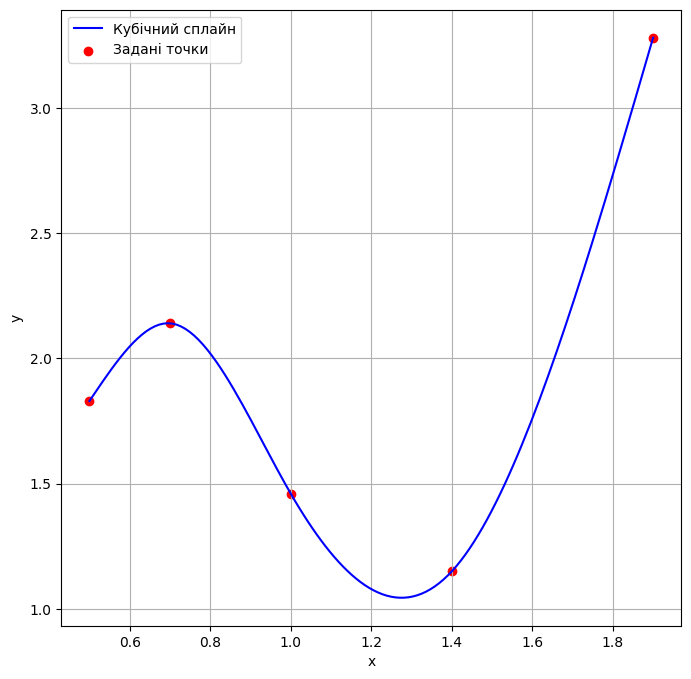

In [5]:
x_values = np.linspace(np.min(x), np.max(x), 130)
y_values = [ ]

for i in range(n):
    mask = (x_values >= x[i]) & (x_values <= x[i + 1])
    x_interval = x_values[mask]
    y_interval = a[i] + b[i] * (x_interval - x[i]) + c[i] * (x_interval - x[i]) ** 2 + d[i] * (x_interval - x[i]) ** 3
    y_values.extend(y_interval)

plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label="Кубічний сплайн", color='b')
plt.scatter(x, y, label="Задані точки", color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [6]:
from scipy.interpolate import CubicSpline

x = np.array([0.5, 0.7, 1, 1.4, 1.9])
y = np.array([1.83, 2.14, 1.46, 1.15, 3.28])

cs = CubicSpline(x, y)

for i in range(len(x)-1):
    coeffs = cs.c[:, i]
    spline = f'S_{i+1}(x) = {coeffs[0]:.4f}*(x - {x[i]})^3 + {coeffs[1]:.4f}*(x - {x[i]})^2 + {coeffs[2]:.4f}*(x - {x[i]}) + {coeffs[3]:.4f}'
    print(spline)

S_1(x) = 14.0146*(x - 0.5)^3 + -17.4436*(x - 0.5)^2 + 4.4781*(x - 0.5) + 1.8300
S_2(x) = 14.0146*(x - 0.7)^3 + -9.0348*(x - 0.7)^2 + -0.8175*(x - 0.7) + 2.1400
S_3(x) = 1.5508*(x - 1.0)^3 + 3.5784*(x - 1.0)^2 + -2.4545*(x - 1.0) + 1.4600
S_4(x) = 1.5508*(x - 1.4)^3 + 5.4394*(x - 1.4)^2 + 1.1526*(x - 1.4) + 1.1500


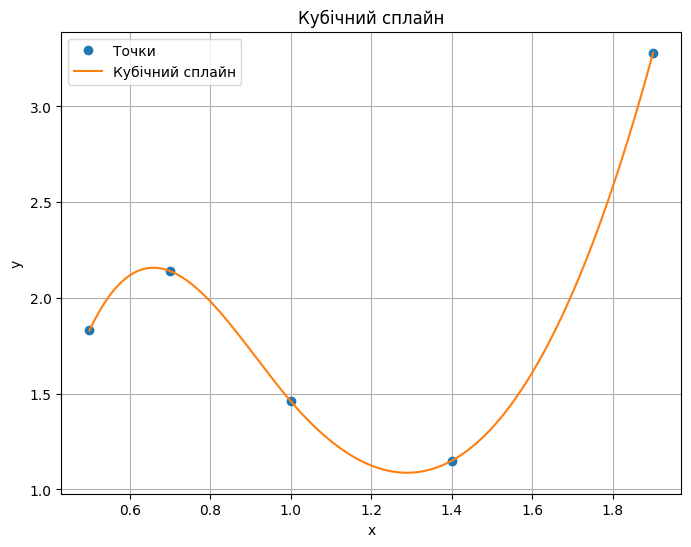

In [9]:
cs = CubicSpline(x, y)

x_new = np.linspace(np.min(x), np.max(x), 130)
y_new = cs(x_new)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def gauss(A, b):
    n = len(b)
    for i in range(n):
        max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[i], A[max_row] = A[max_row], A[i]
        b[i], b[max_row] = b[max_row], b[i]

        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            b[j] -= factor * b[i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]

    x = [0 for _ in range(n)]
    for i in range(n-1, -1, -1):
        sum_ax = sum(A[i][j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - sum_ax) / A[i][i]
    return x

x = [0.5, 0.7, 1, 1.4, 1.9]
f = [1.83, 2.14, 1.46, 1.15, 3.28]

d = len(x)

s = [0]*4*(d-1)
A = []
for i in range(4*(d-1)):
    A.append(s[:])
b = s[:]

for j in range(d-1):
    for i in range(4):
        A[j][i+4*j] = (x[j]-x[j+1])**i
    b[j] = f[j]

for j in range(d-1, 2*(d-1)):
    A[j][4*(j-(d-1))] = 1
    b[j] = f[j-(d-1)+1]

for j in range(2*(d-1), 3*d-4):
    for i in range(4):
        if i == 0:
            A[j][1+4*(j-2*(d-1))] = -1
        else:
            A[j][i+4+4*(j-2*(d-1))] = i*(x[1+(j-2*(d-1))]-x[2+(j-2*(d-1))])**(i-1)

for j in range(3*d-4, 4*d-6):
    A[j][2+4*(j-(3*d-4))] = -2
    A[j][6+4*(j-(3*d-4))] = 2
    A[j][7+4*(j-(3*d-4))] = 6*(x[1+j-(3*d-4)]-x[2+j-(3*d-4)])

A[4*d-6][2] = 2
A[4*d-6][3] = 6*(x[0]-x[1])
A[4*d-5][-2] = 2

c = gauss(A, b)

print('Сплайни')
for j in range(d-1):
    spline = 'S_' + str(j+1) + '(x) = ' + str(c[0+4*j]) + '+'
    for i in range(1, 4):
        spline += str(c[i+4*j]) + '*(x-' + str(x[j+1]) + ')^' + str(i) + '+'
    spline = spline[:-1].replace('+-', '-').replace('^1', '')
    spline += ', на [' + str(x[j]) + ';' + str(x[j+1]) + ']'
    print(spline)

Сплайни
S_1(x) = 2.1399999999999997-0.1258204428268117*(x-0.7)-12.568653321201086*(x-0.7)^2-20.947755535335148*(x-0.7)^3, на [0.5;0.7]
S_2(x) = 1.46-2.777763117986047*(x-1)+3.7288444040036355*(x-1)^2+18.10833080578302*(x-1)^3, на [0.7;1]
S_3(x) = 1.15+1.7389884743706387*(x-1.4)+7.563034576888082*(x-1.4)^2+3.1951584774037065*(x-1.4)^3, на [1;1.4]
S_4(x) = 3.28+5.52050576281468*(x-1.9)+0.0*(x-1.9)^2-5.042023051258721*(x-1.9)^3, на [1.4;1.9]
